In [1]:
'''
아래의 코드는
"독특한 예제를 통해 배우는 데이터 분석 입문
  - 파이썬으로 데이터 주무르기(민형기 지음)" 책에서 제공하는 코드입니다.

민형기 저자님에게 동의를 구하고 올립니다.
'''

In [ ]:
# 3장 네이버 영화 평점 기준 영화의 평점 변화 확인하기

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
from urllib.request import urlopen

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190715'

page = urlopen(url)

soup = BeautifulSoup(page, 'html.parser')
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20190715" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [3]:
soup.find_all('div','tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=171539" title="그린 북">그린 북</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=163788" title="알라딘">알라딘</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=136900" title="어벤져스: 엔드게임">어벤져스: 엔드게임</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183132" title="교회오빠">교회오빠</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=18781" title="이웃집 토토로">이웃집 토토로</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=83893" title="광해, 왕이 된 남자">광해, 왕이 된 남자</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=101966" title="토이 스토리 4">토이 스토리 4</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=18050" title="마녀 배달부 키키">마녀 배달부 키키</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=147001" title="내부자들: 디 오리지널">내부자들: 디 오리지널</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10504" title="양들의

In [5]:
soup.find_all('div','tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=171539" title="그린 북">그린 북</a>
</div>

In [6]:
soup.find_all('div','tit5')[0].a

<a href="/movie/bi/mi/basic.nhn?code=171539" title="그린 북">그린 북</a>

In [7]:
soup.find_all('div','tit5')[0].a.string

'그린 북'

In [8]:
soup.find_all('td','point')

[<td class="point">9.61</td>,
 <td class="point">9.45</td>,
 <td class="point">9.39</td>,
 <td class="point">9.29</td>,
 <td class="point">9.27</td>,
 <td class="point">9.23</td>,
 <td class="point">9.09</td>,
 <td class="point">9.07</td>,
 <td class="point">9.03</td>,
 <td class="point">9.00</td>,
 <td class="point">9.00</td>,
 <td class="point">8.97</td>,
 <td class="point">8.92</td>,
 <td class="point">8.91</td>,
 <td class="point">8.90</td>,
 <td class="point">8.87</td>,
 <td class="point">8.76</td>,
 <td class="point">8.74</td>,
 <td class="point">8.59</td>,
 <td class="point">8.58</td>,
 <td class="point">8.52</td>,
 <td class="point">8.50</td>,
 <td class="point">8.45</td>,
 <td class="point">8.43</td>,
 <td class="point">8.43</td>,
 <td class="point">8.42</td>,
 <td class="point">8.40</td>,
 <td class="point">8.37</td>,
 <td class="point">8.34</td>,
 <td class="point">8.31</td>,
 <td class="point">8.30</td>,
 <td class="point">8.29</td>,
 <td class="point">8.21</td>,
 <td class

In [9]:
len(soup.find_all('td','point'))

50

In [11]:
soup.find_all('td','point')[0].string

'9.61'

In [12]:
movie_name = [soup.find_all('div','tit5')[n].a.string for n in range(0, 49)]
movie_name

['그린 북',
 '알라딘',
 '어벤져스: 엔드게임',
 '교회오빠',
 '이웃집 토토로',
 '광해, 왕이 된 남자',
 '토이 스토리 4',
 '마녀 배달부 키키',
 '내부자들: 디 오리지널',
 '양들의 침묵',
 '번지 점프를 하다',
 '기쿠지로의 여름',
 '천로역정: 천국을 찾아서',
 '세상을 바꾼 변호인',
 '에이미',
 '연인',
 '부에나 비스타 소셜 클럽',
 '고양이를 부탁해',
 '라라랜드',
 '엑소시스트',
 '기생충',
 '그녀',
 '옥자',
 '오멘',
 '스파이더맨: 파 프롬 홈',
 '레토',
 '안도 타다오',
 '콜드 워',
 '다가오는 것들',
 '바스터즈: 거친 녀석들',
 '리스본행 야간열차',
 '존 윅 3: 파라벨룸',
 '사일런스',
 '로켓맨',
 '나의 산티아고',
 '황혼에서 새벽까지',
 '악인전',
 '28일 후',
 '좋은 놈, 나쁜 놈, 이상한 놈',
 '롱 리브 더 킹: 목포 영웅',
 '진범',
 '노리개: 그녀의 눈물',
 '미드소마',
 '서스페리아',
 '애나벨 집으로',
 '기방도령',
 '비스트',
 '걸캅스',
 '맨 인 블랙: 인터내셔널']

In [14]:
movie_point = [soup.find_all('td','point')[n].string for n in range(0,49)]
movie_point

['9.61',
 '9.45',
 '9.39',
 '9.29',
 '9.27',
 '9.23',
 '9.09',
 '9.07',
 '9.03',
 '9.00',
 '9.00',
 '8.97',
 '8.92',
 '8.91',
 '8.90',
 '8.87',
 '8.76',
 '8.74',
 '8.59',
 '8.58',
 '8.52',
 '8.50',
 '8.45',
 '8.43',
 '8.43',
 '8.42',
 '8.40',
 '8.37',
 '8.34',
 '8.31',
 '8.30',
 '8.29',
 '8.21',
 '8.15',
 '8.12',
 '8.08',
 '7.94',
 '7.91',
 '7.74',
 '7.73',
 '7.63',
 '7.36',
 '7.00',
 '6.89',
 '6.74',
 '6.31',
 '6.17',
 '5.61',
 '5.46']

In [18]:
date = pd.date_range('2019-4-10', periods=100, freq='D')
date

DatetimeIndex(['2019-04-10', '2019-04-11', '2019-04-12', '2019-04-13',
               '2019-04-14', '2019-04-15', '2019-04-16', '2019-04-17',
               '2019-04-18', '2019-04-19', '2019-04-20', '2019-04-21',
               '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25',
               '2019-04-26', '2019-04-27', '2019-04-28', '2019-04-29',
               '2019-04-30', '2019-05-01', '2019-05-02', '2019-05-03',
               '2019-05-04', '2019-05-05', '2019-05-06', '2019-05-07',
               '2019-05-08', '2019-05-09', '2019-05-10', '2019-05-11',
               '2019-05-12', '2019-05-13', '2019-05-14', '2019-05-15',
               '2019-05-16', '2019-05-17', '2019-05-18', '2019-05-19',
               '2019-05-20', '2019-05-21', '2019-05-22', '2019-05-23',
               '2019-05-24', '2019-05-25', '2019-05-26', '2019-05-27',
               '2019-05-28', '2019-05-29', '2019-05-30', '2019-05-31',
               '2019-06-01', '2019-06-02', '2019-06-03', '2019-06-04',
      

In [21]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190715'
    response = urlopen(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, 'html.parser')
    
    end = len(soup.find_all('td','point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div','tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td','point')[n].string for n in range(0, end)])

In [22]:
len(movie_date), len(movie_name), len(movie_point)

(5000, 5000, 5000)

In [23]:
movie = pd.DataFrame({'date': movie_data, 'name': movie_name, 'point': movie_point})
movie.head()

,date,name,point
0,2019-04-10,그린 북,9.61
1,2019-04-10,알라딘,9.45
2,2019-04-10,어벤져스: 엔드게임,9.39
3,2019-04-10,교회오빠,9.29
4,2019-04-10,이웃집 토토로,9.27


In [24]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
date     5000 non-null datetime64[ns]
name     5000 non-null object
point    5000 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 117.3+ KB


In [25]:
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
date     5000 non-null datetime64[ns]
name     5000 non-null object
point    5000 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 117.3+ KB


In [26]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
그린 북,961.0
알라딘,945.0
어벤져스: 엔드게임,939.0
교회오빠,929.0
이웃집 토토로,927.0


In [45]:
tmp = movie.query('name == ["그린 북"]')
tmp.head()

,date,name,point
0,2019-04-10,그린 북,9.61
50,2019-04-11,그린 북,9.61
100,2019-04-12,그린 북,9.61
150,2019-04-13,그린 북,9.61
200,2019-04-14,그린 북,9.61


No handles with labels found to put in legend.


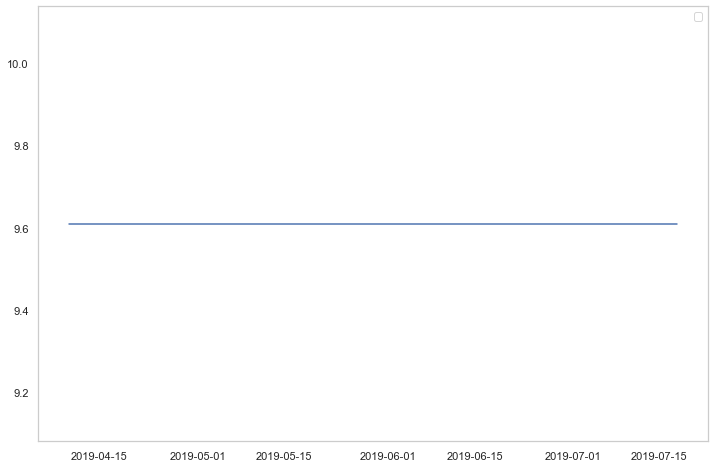

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [47]:
movie_best.head()

,point
name,
그린 북,961.0
알라딘,945.0
어벤져스: 엔드게임,939.0
교회오빠,929.0
이웃집 토토로,927.0
